In [55]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [56]:
#  Load the dataset
file_path = "Social Meida Dataset.xlsx" 
df = pd.read_excel(file_path)

# Preview dataset
print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset preview:
   Consumer ID  Customer Name  Age      Gender  Income (USD) Education Level  \
0            1  Alice Johnson   28      Female         45000      Bachelor's   
1            2      Bob Smith   35        Male         60000        Master's   
2            3   Chris Taylor   22  Non-binary         32000     High School   
3            4    David Brown   40        Male         75000             PhD   
4            5    Emily White   29      Female         55000      Bachelor's   

   Social Media Usage (Hours/Day) Social Media Platforms  \
0                             2.5     Instagram, Twitter   
1                             1.8    Facebook, Instagram   
2                             4.0       TikTok, Snapchat   
3                             3.2     Facebook, LinkedIn   
4                             2.0      Instagram, TikTok   

        Influence Level Purchase Decision Product Category Specific Product  \
0      Very Influential               Yes          Fashion    

In [57]:
# Data Cleaning
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Consumer ID                        0
Customer Name                      0
Age                                0
Gender                             0
Income (USD)                       0
Education Level                    0
Social Media Usage (Hours/Day)     0
Social Media Platforms             0
Influence Level                    0
Purchase Decision                  0
Product Category                  15
Specific Product                  15
Amount Spent (USD)                 0
Brand Name                        15
City                               0
dtype: int64


In [58]:
# Fill missing product-related fields with "Unknown"
df['Product Category'] = df['Product Category'].fillna("Unknown")
df['Specific Product'] = df['Specific Product'].fillna("Unknown")
df['Brand Name'] = df['Brand Name'].fillna("Unknown")

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Consumer ID                       0
Customer Name                     0
Age                               0
Gender                            0
Income (USD)                      0
Education Level                   0
Social Media Usage (Hours/Day)    0
Social Media Platforms            0
Influence Level                   0
Purchase Decision                 0
Product Category                  0
Specific Product                  0
Amount Spent (USD)                0
Brand Name                        0
City                              0
dtype: int64


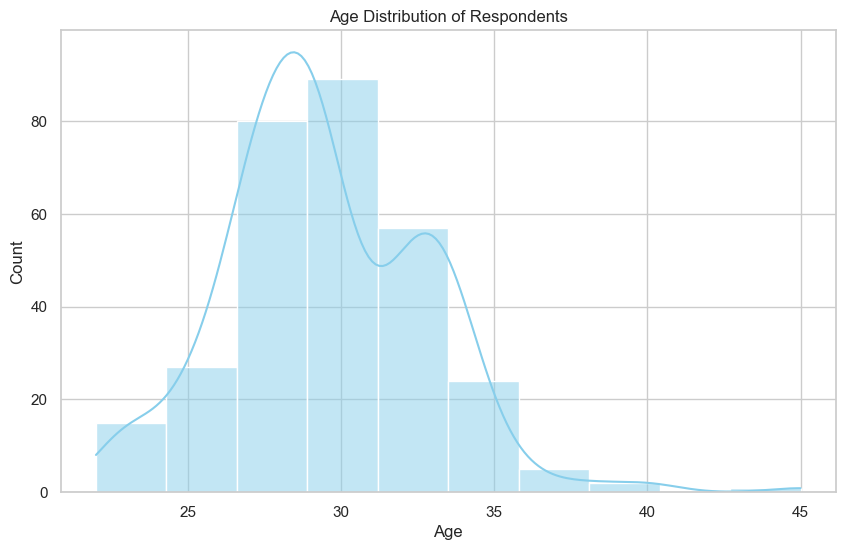

In [59]:
# Age distribution
sns.histplot(df["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution of Respondents")
plt.savefig("age_distribution.png")
plt.show()

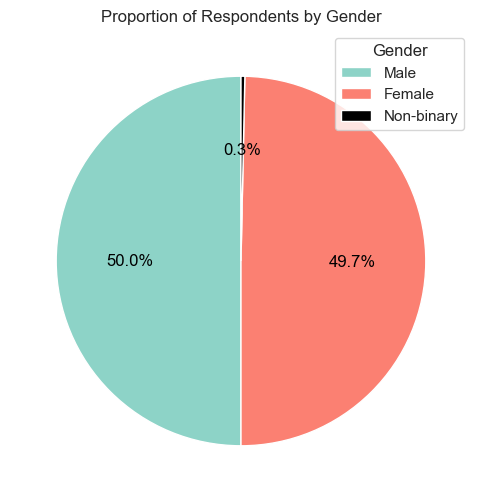

In [60]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
colors = ['#8dd3c7', '#fb8072', '#000000']  

patches, texts, autotexts = plt.pie(
    gender_counts,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color':'black'}
)

plt.legend(patches, gender_counts.index, title="Gender", loc="best")
plt.title('Proportion of Respondents by Gender')
plt.savefig("gender_pie_chart.png")
plt.show()


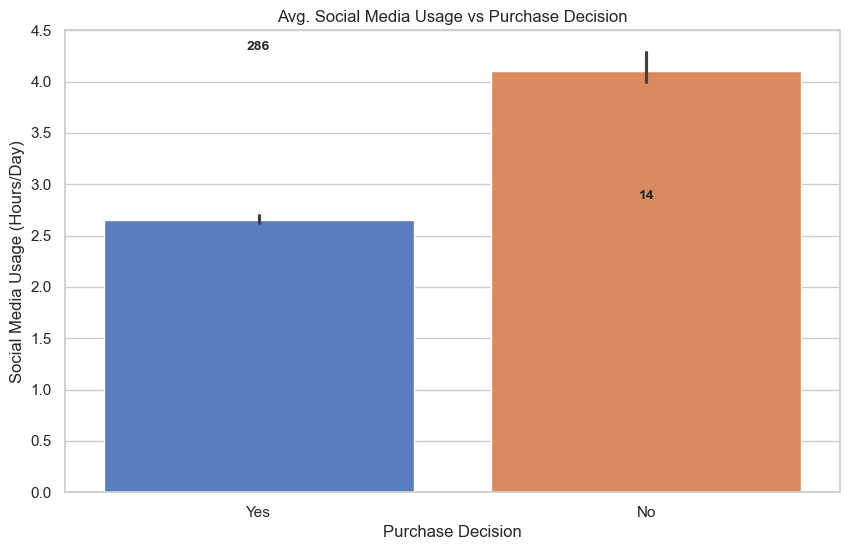

In [61]:
# Create barplot
ax = sns.barplot(
    x="Purchase Decision",
    y="Social Media Usage (Hours/Day)",
    hue="Purchase Decision",
    data=df,
    palette="muted",
    legend=False
)
plt.title("Avg. Social Media Usage vs Purchase Decision")

# Add counts above bars
counts = df["Purchase Decision"].value_counts()
for i, count in enumerate(counts):
    ax.text(i, df.groupby("Purchase Decision")["Social Media Usage (Hours/Day)"].mean().iloc[i] + 0.2,
            f"{count}", ha='center', fontsize=10, fontweight='bold')

plt.savefig("usage_vs_purchase_with_counts.png")
plt.show()


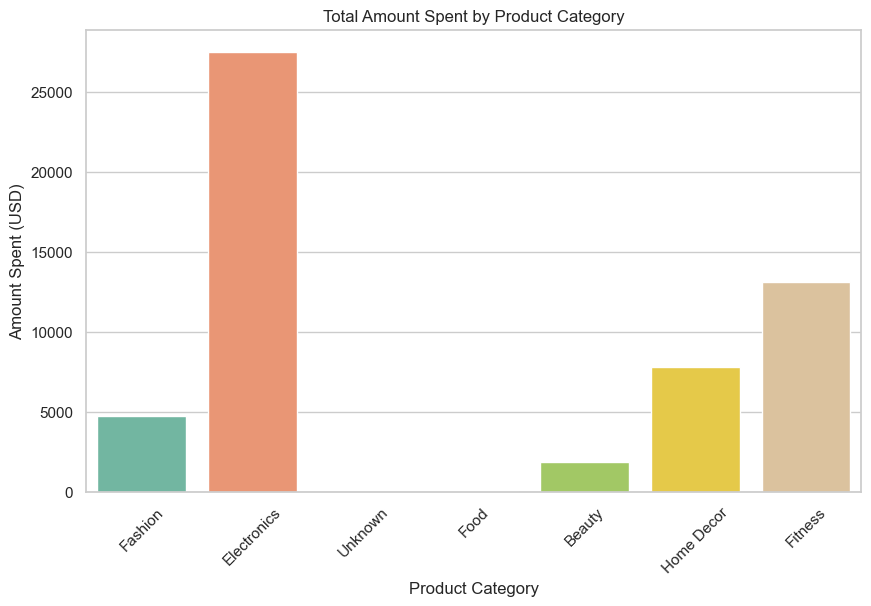

In [62]:
# Amount Spent by Product Category
sns.barplot(x="Product Category", y="Amount Spent (USD)", data=df,
            estimator=sum, errorbar=None, hue="Product Category",
            palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Total Amount Spent by Product Category")
plt.savefig("amount_by_category.png")
plt.show()

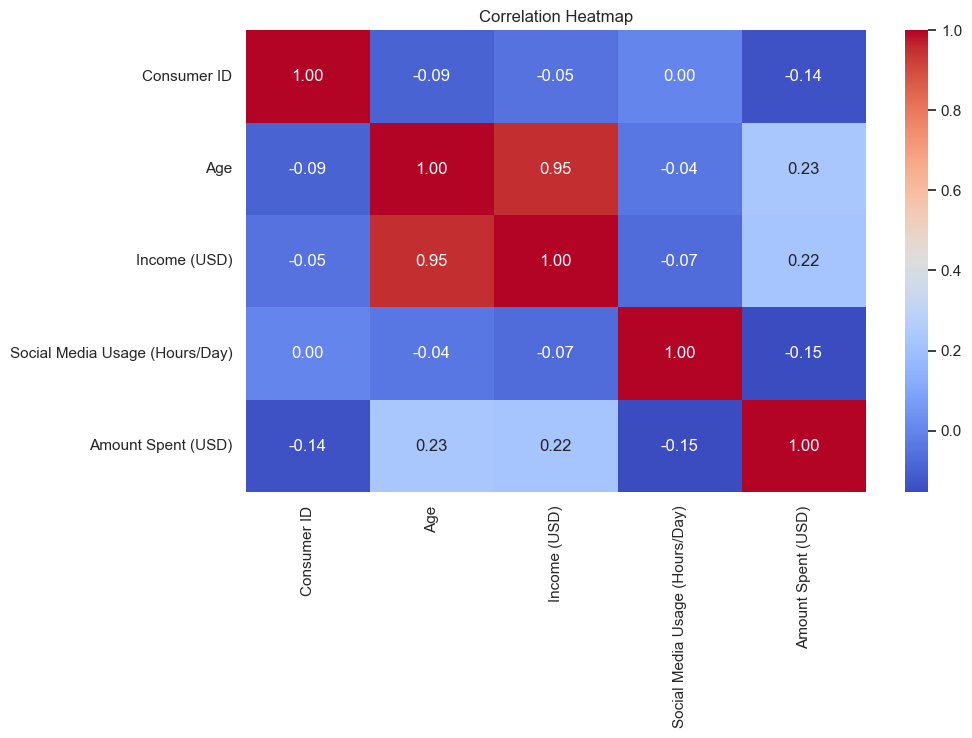

In [63]:
#  Correlation Analysis

corr_matrix = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()



In [64]:
#  Key Insights
print("\n--- Key Findings ---")
avg_usage_yes = df[df["Purchase Decision"] == "Yes"]["Social Media Usage (Hours/Day)"].mean()
avg_usage_no = df[df["Purchase Decision"] == "No"]["Social Media Usage (Hours/Day)"].mean()

print(f"Average usage for purchase-influenced consumers: {avg_usage_yes:.2f} hrs/day")
print(f"Average usage for non-influenced consumers: {avg_usage_no:.2f} hrs/day")

top_category = df.groupby("Product Category")["Amount Spent (USD)"].sum().idxmax()
print(f"Highest spending category: {top_category}")

most_influential_platform = df["Social Media Platforms"].mode()[0]
print(f"Most common social media platform used: {most_influential_platform}")


--- Key Findings ---
Average usage for purchase-influenced consumers: 2.66 hrs/day
Average usage for non-influenced consumers: 4.11 hrs/day
Highest spending category: Electronics
Most common social media platform used: TikTok, Snapchat


In [65]:
from scipy.stats import ttest_ind

# Separate groups
usage_yes = df[df["Purchase Decision"] == "Yes"]["Social Media Usage (Hours/Day)"]
usage_no = df[df["Purchase Decision"] == "No"]["Social Media Usage (Hours/Day)"]

# Perform t-test
t_stat, p_val = ttest_ind(usage_yes, usage_no, equal_var=False)

print(f"T-test for Social Media Usage between Purchase Decision groups:")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("Result: Significant difference in social media usage between groups.")
else:
    print("Result: No significant difference in social media usage between groups.")


T-test for Social Media Usage between Purchase Decision groups:
T-statistic = -18.221, p-value = 0.0000
Result: Significant difference in social media usage between groups.


In [66]:
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df["Social Media Platforms"], df["Purchase Decision"])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square test for Social Media Platforms and Purchase Decision:")
print(f"Chi2 statistic = {chi2:.3f}, p-value = {p:.4f}")

if p < 0.05:
    print("Result: Significant association between platform usage and purchase decision.")
else:
    print("Result: No significant association found.")



Chi-square test for Social Media Platforms and Purchase Decision:
Chi2 statistic = 54.400, p-value = 0.0001
Result: Significant association between platform usage and purchase decision.


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# ANOVA test
model = ols('Q("Amount Spent (USD)") ~ Q("Influence Level")', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA results for Spending by Influence Level:")
print(anova_table)



ANOVA results for Spending by Influence Level:
                            sum_sq     df         F    PR(>F)
Q("Influence Level")  5.348593e+05    2.0  3.988339  0.019532
Residual              1.991471e+07  297.0       NaN       NaN


In [68]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and Target
X = df.drop(columns=["Purchase Decision"])
y = df["Purchase Decision"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [69]:
# Model: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



Accuracy: 98.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.98      0.99        58

    accuracy                           0.98        60
   macro avg       0.83      0.99      0.90        60
weighted avg       0.99      0.98      0.98        60



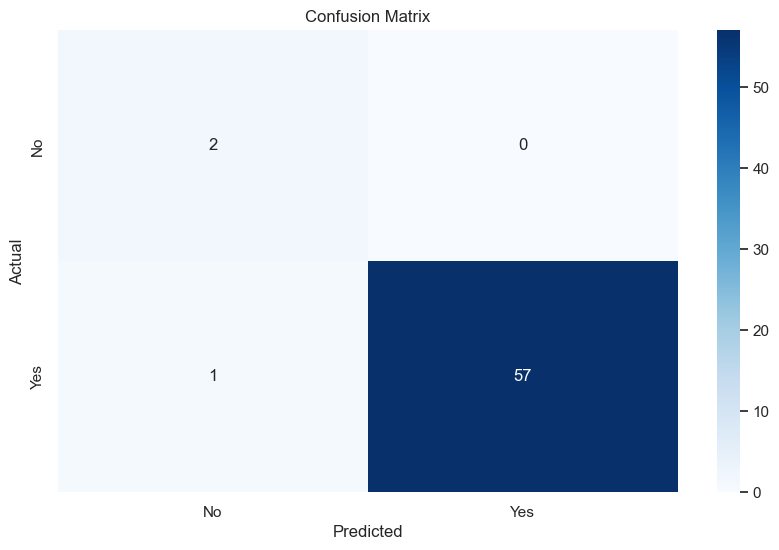

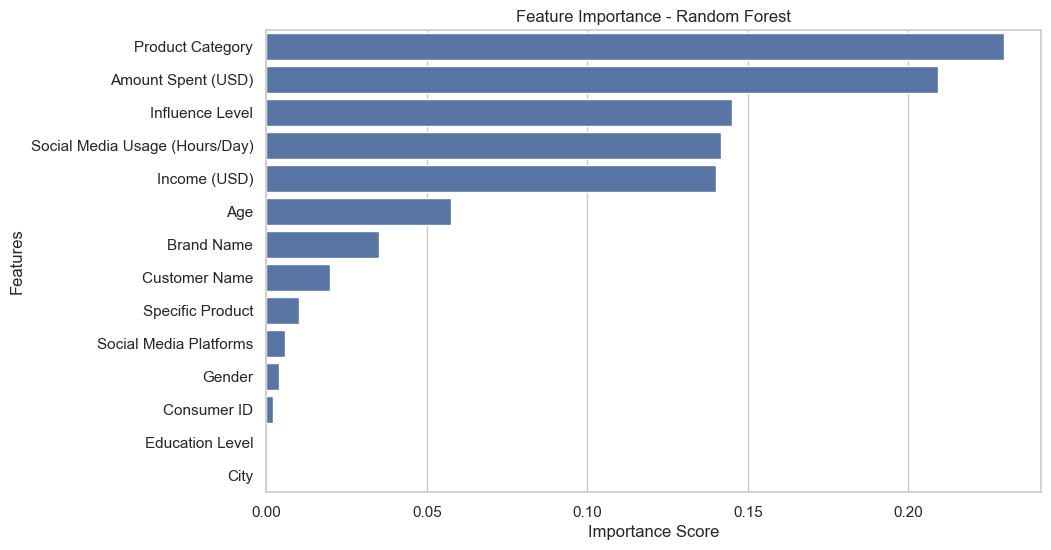

In [70]:
# Evaluation
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()
# Now define importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig("feature_importance.png")
plt.show()